# Regresja liniowa: nadmierne dopasowanie i regularyzacja

W tym zadaniu zobaczymy, jak modele liniowe przetrenowują się, zrozumiemy, dlaczego tak się dzieje i dowiemy się, jak diagnozować i kontrolować przetrenowanie.

We wszystkich komórkach, w których znajduje się komentarz z instrukcjami, należy napisać kod wykonujący te instrukcje. Pozostałe komórki z kodem (bez komentarzy) należy po prostu wykonać. Ponadto zadanie wymaga udzielenia odpowiedzi na pytania; odpowiedzi należy wpisać po wyróżnionym słowie "__Answer:__".

In [29]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

Będziemy pracować ze zbiorem danych "bikes_rent.csv", który zawiera informacje kalendarzowe i warunki pogodowe, które charakteryzują zautomatyzowane punkty wypożyczania rowerów, a także liczbę wypożyczeń w danym dniu. Te ostatnie będziemy przewidywać; w ten sposób rozwiążemy problem regresji.

## Zapoznanie się z danymi

## Zadanie 1

Załaduj zestaw danych za pomocą funkcji __pandas.read_csv__ do zmiennej __df__. Wydrukuj pierwsze 5 wierszy, aby upewnić się, że dane zostały poprawnie odczytane:

In [30]:
df = pd.read_csv("data/bikes_rent.csv")
print(df.head())

   season  yr  mnth  holiday  weekday  workingday  weathersit       temp  \
0       1   0     1        0        6           0           2  14.110847   
1       1   0     1        0        0           0           2  14.902598   
2       1   0     1        0        1           1           1   8.050924   
3       1   0     1        0        2           1           1   8.200000   
4       1   0     1        0        3           1           1   9.305237   

      atemp      hum  windspeed(mph)  windspeed(ms)   cnt  
0  18.18125  80.5833       10.749882       4.805490   985  
1  17.68695  69.6087       16.652113       7.443949   801  
2   9.47025  43.7273       16.636703       7.437060  1349  
3  10.60610  59.0435       10.739832       4.800998  1562  
4  11.46350  43.6957       12.522300       5.597810  1600  


Dla każdego dnia roboczego znane są następujące atrybuty:
* _season_: 1 - wiosna, 2 - lato, 3 - jesień, 4 - zima.
* _yr_: 0 - 2011, 1 - 2012
* _mnth_: od 1 do 12.
* _holiday_: 0 - brak wakacji, 1 - wakacje.
* _weekday_: 0 do 6
* _workingday_: 0 oznacza dzień wolny od pracy, 1 oznacza dzień roboczy.
* _weathersit_: ocena korzystnej pogody od 1 (czysty, pogodny dzień) do 4 (ulewny deszcz, mgła)
* _temp_: temperatura w stopniach Celsjusza.
* _atemp_: temperatura w stopniach Celsjusza.
* _hum_: wilgotność
* _windspeed(mph)_: prędkość wiatru w milach na godzinę.
* _windspeed(ms)_: prędkość wiatru w metrach na sekundę.
* _cnt_: liczba wypożyczonych rowerów (jest to atrybut docelowy, będziemy go przewidywać).

Mamy więc cechy rzeczywiste, binarne i nominalne (porządkowe), a wszystkie z nich można traktować jako cechy rzeczywiste. Atrybuty nominalne mogą być również traktowane jako rzeczywiste, ponieważ mają porządek. Zobaczmy na wykresach, jak cecha docelowa zależy od innych cech

Wykres zależności atrybutów od liczby przejazdów. Innymi słowy, należy zbudować 12 wykresów. Każdy z nich powinien pokazywać zależność kolejnego atrybutu od zmiennej **cnt**.

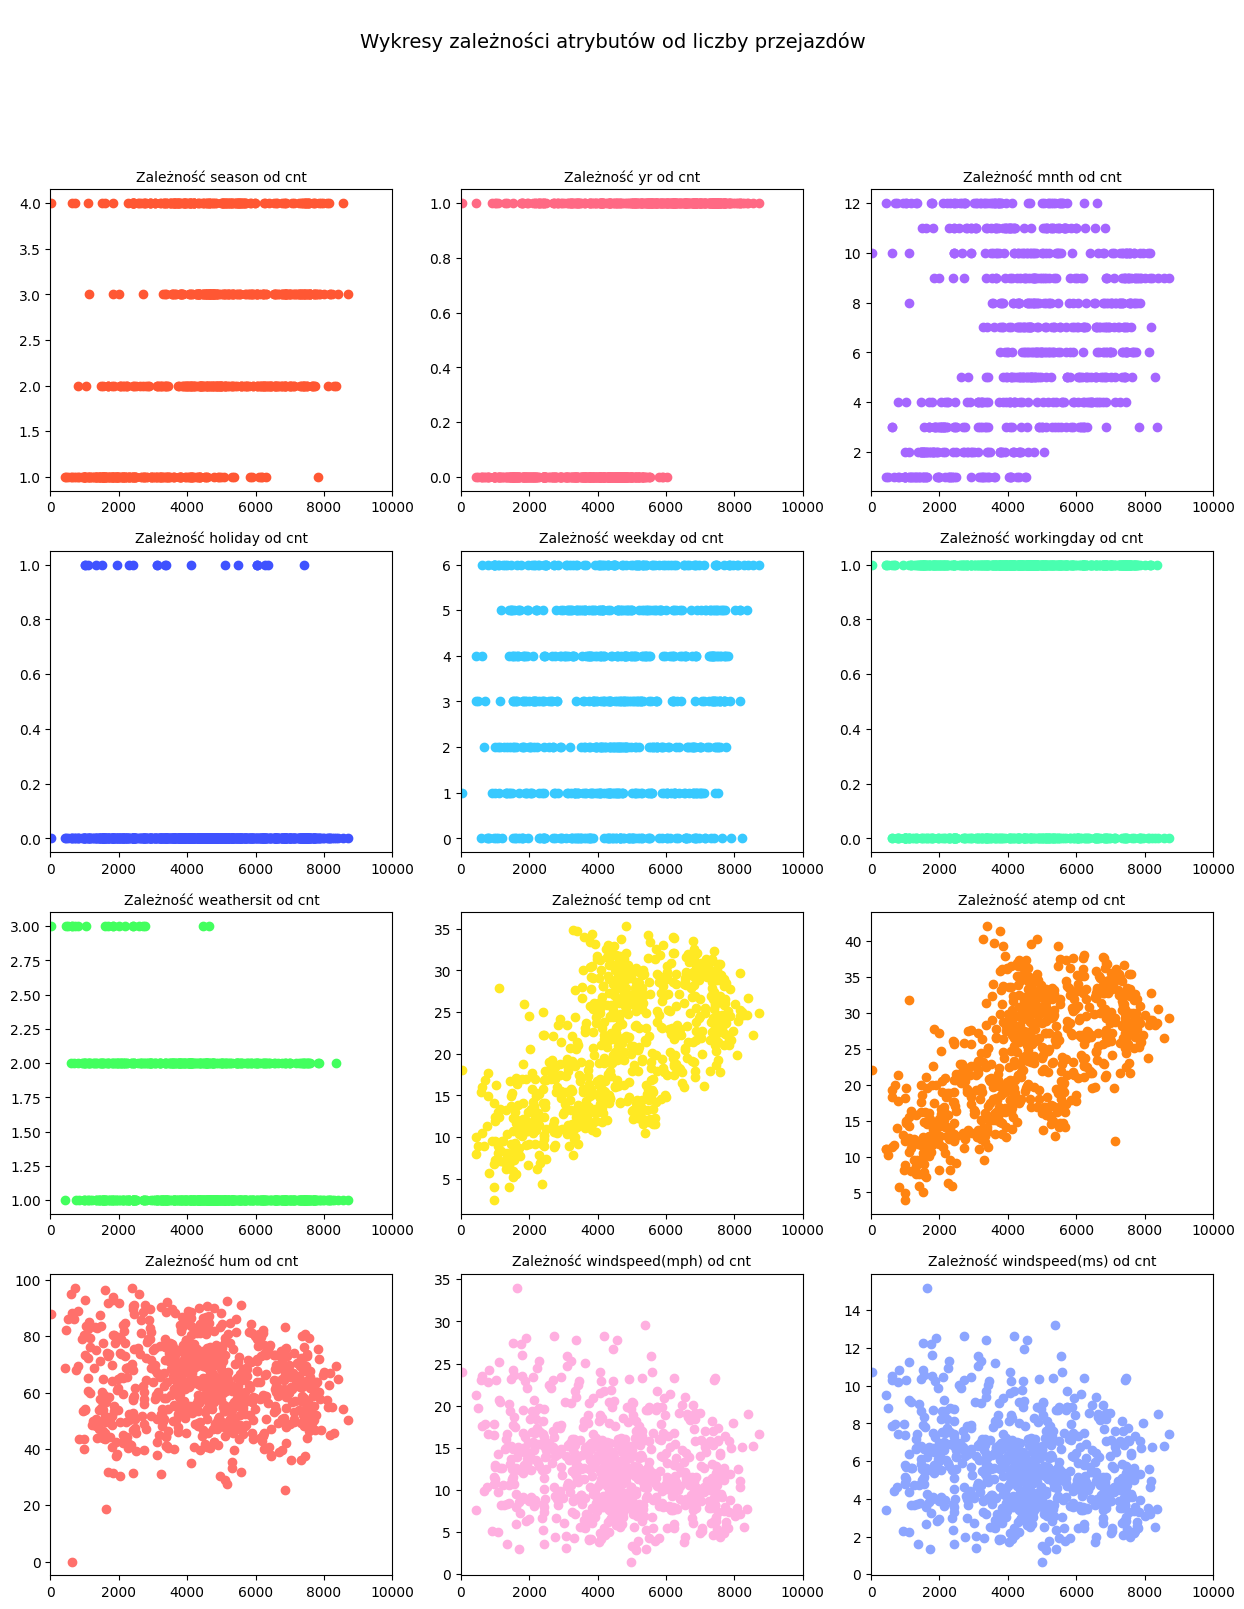

In [31]:
fig, axs = plt.subplots(4, 3, figsize=(15, 18))
fig.suptitle("\nWykresy zależności atrybutów od liczby przejazdów", fontsize=14)
labels = df["cnt"]

axs[0,0].plot(labels, df["season"], linestyle = "", color="#FF5733", marker="o")
axs[0,0].set_xlim(0,10000)
axs[0,0].set_title("Zależność season od cnt", fontsize = 10)

axs[0,1].plot(labels, df["yr"], linestyle = "", color="#FF6984", marker="o")
axs[0,1].set_xlim(0,10000)
axs[0,1].set_title("Zależność yr od cnt", fontsize = 10)

axs[0,2].plot(labels, df["mnth"], linestyle = "", color="#A566FF", marker="o")
axs[0,2].set_xlim(0,10000)
axs[0,2].set_title("Zależność mnth od cnt", fontsize = 10)

axs[1,0].plot(labels, df["holiday"], linestyle = "", color="#3F52FF", marker="o")
axs[1,0].set_xlim(0,10000)
axs[1,0].set_title("Zależność holiday od cnt", fontsize = 10)

axs[1,1].plot(labels, df["weekday"], linestyle = "", color="#38C9FF", marker="o")
axs[1,1].set_xlim(0,10000)
axs[1,1].set_title("Zależność weekday od cnt", fontsize = 10)

axs[1,2].plot(labels, df["workingday"], linestyle = "", color="#49FFB0", marker="o")
axs[1,2].set_xlim(0,10000)
axs[1,2].set_title("Zależność workingday od cnt", fontsize = 10)

axs[2,0].plot(labels, df["weathersit"], linestyle = "", color="#42FF5E", marker="o")
axs[2,0].set_xlim(0,10000)
axs[2,0].set_title("Zależność weathersit od cnt", fontsize = 10)

axs[2,1].plot(labels, df["temp"], linestyle = "", color="#FFE923", marker="o")
axs[2,1].set_xlim(0,10000)
axs[2,1].set_title("Zależność temp od cnt", fontsize = 10)

axs[2,2].plot(labels, df["atemp"], linestyle = "", color="#FF8411", marker="o")
axs[2,2].set_xlim(0,10000)
axs[2,2].set_title("Zależność atemp od cnt", fontsize = 10)

axs[3,0].plot(labels, df["hum"], linestyle = "", color="#FF706B", marker="o")
axs[3,0].set_xlim(0,10000)
axs[3,0].set_title("Zależność hum od cnt", fontsize = 10)

axs[3,1].plot(labels, df["windspeed(mph)"], linestyle = "", color="#FFAFE0", marker="o")
axs[3,1].set_xlim(0,10000)
axs[3,1].set_title("Zależność windspeed(mph) od cnt", fontsize = 10)

axs[3,2].plot(labels, df["windspeed(ms)"], linestyle = "", color="#8CA5FF", marker="o")
axs[3,2].set_xlim(0,10000)
axs[3,2].set_title("Zależność windspeed(ms) od cnt", fontsize = 10)

plt.show()

__Pytania:__
1. Jaka jest natura zależności liczby wypożyczeń od miesiąca?
1. Podaj jedną lub dwie cechy, od których liczba wypożyczeń najprawdopodobniej zależy liniowo

Ad. 1. Wykres przypomina odwrócony fragment sinusoidy. Najwięcej wypożyczeń było w miesiącach letnich.

Ad. 2. Najprawdopodbniej liczba wypożyczeń zależy liniowo od cechy temp i atemp.

## Zadanie 2

Bardziej rygorystycznie oceńmy poziom zależności liniowej między cechami a zmienną docelową. Dobrą miarą zależności liniowej między dwoma wektorami jest korelacja Pearsona. Mieliśmy już z nią do czynienia wcześniej. Aby ją obliczyć w pandach, możemy skorzystać z metod dataframe: corr i corrwith.

Oblicz korelacje wszystkich cech oprócz ostatniej z ostatnią cechą za pomocą metody `corrwith`.

In [32]:
df1 = df.loc[:,"season":"windspeed(ms)"]
df2 = df["cnt"]
correlation_pearson = df1.corrwith(df2, method="pearson")
print("Korelacja Pearsona między zestawem cech a cechą docelową cnt:")
print(correlation_pearson)
print(f"\nPoniższe cechy najprawdopodobniej można rozwiązać za pomocą metod liniowych: \n{correlation_pearson[correlation_pearson > 0.5]}")

Korelacja Pearsona między zestawem cech a cechą docelową cnt:
season            0.406100
yr                0.566710
mnth              0.279977
holiday          -0.068348
weekday           0.067443
workingday        0.061156
weathersit       -0.297391
temp              0.627494
atemp             0.631066
hum              -0.100659
windspeed(mph)   -0.234545
windspeed(ms)    -0.234545
dtype: float64

Poniższe cechy najprawdopodobniej można rozwiązać za pomocą metod liniowych: 
yr       0.566710
temp     0.627494
atemp    0.631066
dtype: float64




```
# Wybrany format kodu
```

Istnieją cechy w próbce, które korelują z cechą docelową, co oznacza, że problem można rozwiązać za pomocą metod liniowych.

Z wykresów widzimy, że niektóre cechy są do siebie podobne. Obliczmy więc również korelacje między rzeczywistymi atrybutami.

## Zadanie 3

Oblicz korelacje parami między cechami temp, atemp, hum, windspeed(mph), windspeed(ms) i cnt
przy użyciu metody corr:

In [33]:
correlation_pair_temp_cnt = df[["temp", "cnt"]].corr(method="pearson")
correlation_pair_atemp_cnt = df[["atemp", "cnt"]].corr(method="pearson")
correlation_pair_hum_cnt = df[["hum", "cnt"]].corr(method="pearson")
correlation_pair_windspeed_mph_cnt = df[["windspeed(mph)", "cnt"]].corr(method="pearson")
correlation_pair_windspeed_ms_cnt = df[["windspeed(ms)", "cnt"]].corr(method="pearson")

print(f"Korelacja między: \n{correlation_pair_temp_cnt}")
print(f"\nKorelacja między: \n{correlation_pair_atemp_cnt}")
print(f"\nKorelacja między: \n{correlation_pair_hum_cnt}")
print(f"\nKorelacja między: \n{correlation_pair_windspeed_mph_cnt}")
print(f"\nKorelacja między: \n{correlation_pair_windspeed_ms_cnt}")

Korelacja między: 
          temp       cnt
temp  1.000000  0.627494
cnt   0.627494  1.000000

Korelacja między: 
          atemp       cnt
atemp  1.000000  0.631066
cnt    0.631066  1.000000

Korelacja między: 
          hum       cnt
hum  1.000000 -0.100659
cnt -0.100659  1.000000

Korelacja między: 
                windspeed(mph)       cnt
windspeed(mph)        1.000000 -0.234545
cnt                  -0.234545  1.000000

Korelacja między: 
               windspeed(ms)       cnt
windspeed(ms)       1.000000 -0.234545
cnt                -0.234545  1.000000


Na przekątnych, tak jak powinno być, znajdują się jednostki. Jednak w macierzy znajdują się jeszcze dwie pary silnie skorelowanych kolumn: temp i atemp (skorelowane z natury) oraz dwie prędkości wiatru (ponieważ jest to tylko tłumaczenie niektórych jednostek na inne). Dalej zobaczymy, że fakt ten negatywnie wpływa na uczenie modelu liniowego.

Na koniec przyjrzyjmy się średniej cech (metoda średniej), aby oszacować skalę cech i ułamek 1 w cechach binarnych.

## Zadanie 4

Wyznacz średnią cech

In [34]:
df_mean = df.mean()
print(df_mean)

season               2.496580
yr                   0.500684
mnth                 6.519836
holiday              0.028728
weekday              2.997264
workingday           0.683995
weathersit           1.395349
temp                20.310776
atemp               23.717699
hum                 62.789406
windspeed(mph)      12.762576
windspeed(ms)        5.705220
cnt               4504.348837
dtype: float64


Atrybuty mają różne skale, więc do dalszej pracy lepiej znormalizujemy macierz obiekt-atrybut.

### Problem pierwszy: cechy współliniowe

Tak więc w naszych danych jedna cecha duplikuje inną cechę i istnieją jeszcze dwie bardzo podobne cechy. Oczywiście moglibyśmy od razu usunąć duplikaty, ale zobaczmy, jak wyglądałby trening modelu, gdybyśmy nie zauważyli tego problemu.

Po pierwsze, wykonajmy skalowanie lub standaryzację cech: od każdej cechy odejmiemy jej średnią i podzielimy ją przez jej odchylenie standardowe. Można to zrobić za pomocą metody skalowania.

Ponadto musimy wymieszać próbkę do walidacji krzyżowej.

In [35]:
from sklearn.preprocessing import scale
from sklearn.utils import shuffle

In [36]:
df_shuffled = shuffle(df, random_state=42)
X = scale(df_shuffled[df_shuffled.columns[:-1]])
y = df_shuffled["cnt"]

Przetrenujmy regresję liniową na naszych danych i przyjrzyjmy się wagom cech.

In [37]:
from sklearn.linear_model import LinearRegression

## Zadanie 5

Utwórz obiekt regresora liniowego, wytrenuj go na wszystkich danych i wyprowadź wagi modelu (wagi są przechowywane w zmiennej `coef_` klasy regresora). Możesz wyprowadzić pary (nazwa funkcji, waga) za pomocą funkcji `zip` wbudowanej w język Python. Nazwy cech są przechowywane w zmiennej `df.columns`.


In [38]:
regressor = LinearRegression().fit(X, y)
# print(X[0,:])
# print(regressor.predict(np.array([1.354375, 0.99863295, 1.58866019, -0.171981, -0.497782, 0.67970582, -0.72604815, -0.10688374, -0.03254528, 0.74372737, -0.21121111, -0.21121111]).reshape(1,-1)))
print("Współczynnik nachylenia:", regressor.coef_)
print("Wyraz wolny:", regressor.intercept_)
regressor_coef_X = list(zip(df.columns[:-1], regressor.coef_))
print(f"\nWagi dla cech wynoszą odpowiednio:")
for i in regressor_coef_X:
    print(i)


Współczynnik nachylenia: [ 5.70863642e+02  1.02196042e+03 -1.41300633e+02 -8.67576047e+01
  1.37227258e+02  5.63898036e+01 -3.30227183e+02  3.67479903e+02
  5.85552180e+02 -1.45615523e+02  1.24543563e+13 -1.24543563e+13]
Wyraz wolny: 4504.354526943398

Wagi dla cech wynoszą odpowiednio:
('season', 570.863641661725)
('yr', 1021.9604245185086)
('mnth', -141.3006331900142)
('holiday', -86.75760471139698)
('weekday', 137.2272583151452)
('workingday', 56.38980357474366)
('weathersit', -330.2271825899341)
('temp', 367.4799030832653)
('atemp', 585.5521797658965)
('hum', -145.6155228231448)
('windspeed(mph)', 12454356291009.727)
('windspeed(ms)', -12454356291208.188)


Widzimy, że wagi dla cech zależnych liniowo są modulo znacznie większe niż dla innych cech. Aby zrozumieć, dlaczego tak się dzieje, przypomnijmy wzór analityczny używany do obliczania wag modelu liniowego w metodzie najmniejszych kwadratów:

$$w = (X^TX)^{-1} X^T y$$.

Jeśli $X$ ma współliniowe (liniowo zależne) kolumny, macierz $X^TX$ staje się zdegenerowana, a wzór nie jest już poprawny. Im bardziej zależne są cechy, tym mniejszy jest wyznacznik tej macierzy i tym gorsze przybliżenie $Xw \approx y$. Sytuacja ta nazywana jest _problemem wieloliniowości_.

Nie stało się tak w przypadku pary (temp, atemp) nieco mniej skorelowanych zmiennych, ale w praktyce zawsze warto uważnie obserwować współczynniki pod kątem podobnych znaków.

Aby rozwiązać problem wieloliniowości, musimy użyć regularyzatora. Do optymalizowanej funkcji dodaje się $L_1$ lub $L_2$ normę wag pomnożoną przez współczynnik regularyzacji $\alpha$. W pierwszym przypadku metoda nazywana jest Lasso, a w drugim --- Ridge

### Zadanie 6
Spróbujmy wytrenować modele liniowe z regularyzacją $L_1$ i $L_2$, a następnie porównajmy ich wagi. Wytrenuj regresory Ridge i Lasso z domyślnymi parametrami i zobacz, że problem z wagami został rozwiązany.

Wytrenować model liniowy z $L_1$-regularizacją (klasa Lasso) i wyprowadzić wagi

In [106]:
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(X, y)
lasso_weights = lasso.coef_
regressor_coef_lasso = list(zip(df.columns[:-1], lasso_weights))
print("Wagi dla modelu liniowego z L1-regularyzacją (Lasso):")
for i in regressor_coef_lasso:
    print(i)


Wagi dla modelu liniowego z L1-regularyzacją (Lasso):
('season', 560.2416160308861)
('yr', 1019.4634940657196)
('mnth', -128.73062703678696)
('holiday', -86.15278133371106)
('weekday', 137.34789390496314)
('workingday', 55.21237064135668)
('weathersit', -332.3698569623487)
('temp', 376.3632362096943)
('atemp', 576.530793504555)
('hum', -144.12915500348583)
('windspeed(mph)', -197.1396894024843)
('windspeed(ms)', -2.8051404183533485e-08)


Wytrenować model liniowy z $L_2$-regularizacją (klasa Ridge) i wyprowadzić wagi

In [107]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(X, y)
ridge_weights = ridge.coef_
regressor_coef_ridge = list(zip(df.columns[:-1], ridge_weights))
print("Wagi dla modelu liniowego z L2-regularyzacją (Ridge):")
for i in regressor_coef_ridge:
    print(i)

Wagi dla modelu liniowego z L2-regularyzacją (Ridge):
('season', 563.0645722520169)
('yr', 1018.9483787875267)
('mnth', -131.87332028247624)
('holiday', -86.74609799709253)
('weekday', 138.00511117871912)
('workingday', 55.90311037506424)
('weathersit', -332.3497884990731)
('temp', 386.45788919192955)
('atemp', 566.3470470600456)
('hum', -145.07132729867266)
('windspeed(mph)', -99.25944108178024)
('windspeed(ms)', -99.25944115435306)


### Zadanie 7

W przeciwieństwie do regularyzacji $L_2$, $L_1$ zeruje wagi dla niektórych cech. Zaobserwujmy, jak zmieniają się wagi wraz ze wzrostem współczynnika regularyzacji $\alpha$.

Dla każdej wartości współczynnika z `alphas`, wytrenuj regresor `Lasso` i zapisz wagi do listy `coefs_lasso`, a następnie wytrenuj `Ridge` i zapisz wagi do listy `coefs_ridge`. Przekonwertuj wynikowe listy na `np.array`.

In [41]:
alphas = np.arange(1, 500, 50)

coefs_lasso = []
coefs_ridge = []

for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    lasso = Lasso(alpha=alpha)
    
    ridge.fit(X, y)
    lasso.fit(X, y)
    
    coefs_ridge.append(ridge.coef_)
    coefs_lasso.append(lasso.coef_)

coefs_ridge = np.array(coefs_ridge)
coefs_lasso = np.array(coefs_lasso)

print(f"Wytrenowany regresor Lasso zwrócił nastepujące wagi:\n{coefs_lasso}")
print(f"\nWytrenowany regresor Rigde zwrócił nastepujące wagi:\n{coefs_ridge}")

Wytrenowany regresor Lasso zwrócił nastepujące wagi:
[[ 5.60241616e+02  1.01946349e+03 -1.28730627e+02 -8.61527813e+01
   1.37347894e+02  5.52123706e+01 -3.32369857e+02  3.76363236e+02
   5.76530794e+02 -1.44129155e+02 -1.97139689e+02 -2.80514042e-08]
 [ 4.10969632e+02  9.77019409e+02 -0.00000000e+00 -5.34489688e+01
   9.19434374e+01  1.75372118e+01 -3.18125568e+02  3.22829934e+02
   6.10031512e+02 -9.10689615e+01 -1.45066095e+02 -2.29892889e-08]
 [ 3.70077089e+02  9.35945490e+02  0.00000000e+00 -1.21619360e+01
   4.88886342e+01  0.00000000e+00 -3.08805664e+02  2.69417263e+02
   6.32502623e+02 -2.75042876e+01 -9.37749037e+01 -2.41657943e-08]
 [ 3.32835717e+02  8.91870058e+02  0.00000000e+00 -0.00000000e+00
   0.00000000e+00  0.00000000e+00 -2.79616688e+02  2.11052030e+02
   6.62920880e+02 -0.00000000e+00 -5.01551472e+01 -2.62789872e-08]
 [ 2.98134448e+02  8.45652857e+02  0.00000000e+00 -0.00000000e+00
   0.00000000e+00  0.00000000e+00 -2.35571345e+02  1.24144807e+02
   7.25379483e+02 -

Przeanalizuj dynamikę wag w miarę zwiększania parametru regularyzacji:

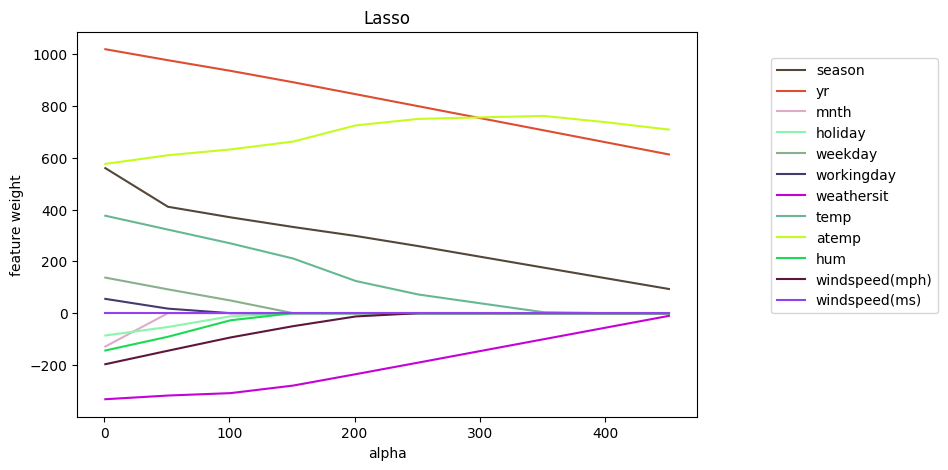

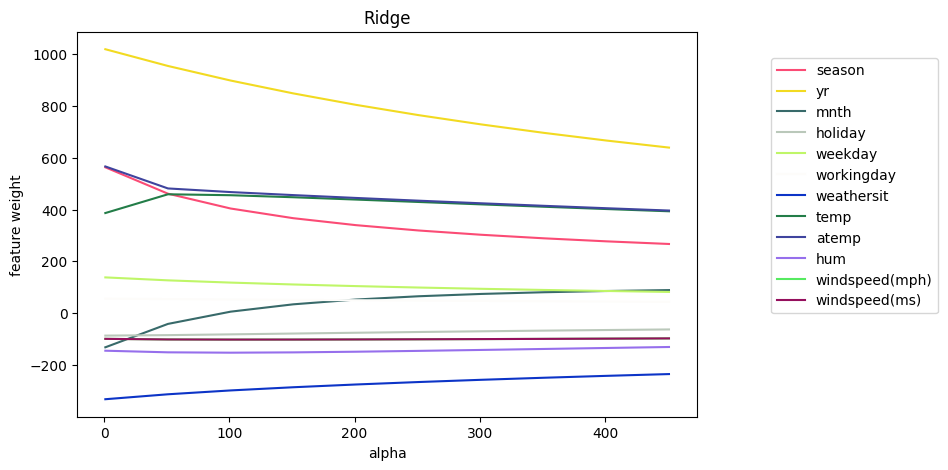

In [42]:
plt.figure(figsize=(8, 5))

for coef, feature in zip(coefs_lasso.T, df.columns):
    plt.plot(alphas, coef, label=feature, color=np.random.rand(3))

plt.legend(loc="upper right", bbox_to_anchor=(1.4, 0.95))
plt.xlabel("alpha")
plt.ylabel("feature weight")
plt.title("Lasso")

plt.figure(figsize=(8, 5))
for coef, feature in zip(coefs_ridge.T, df.columns):
    plt.plot(alphas, coef, label=feature, color=np.random.rand(3))

plt.legend(loc="upper right", bbox_to_anchor=(1.4, 0.95))
plt.xlabel("alpha")
plt.ylabel("feature weight")
plt.title("Ridge")

plt.show()

Przeanalizuj wykresy i odpowiedz na poniższe pytania.

1. Który regularyzator (Ridge czy Lasso) bardziej agresywnie redukuje wagi dla tej samej wartości alfa?
2. Co dzieje się z wagami Lasso, jeśli wartość alfa jest bardzo duża? Wyjaśnij, dlaczego tak się dzieje.
3. Czy można argumentować, że `Lasso` eliminuje jedną z cech `prędkość wiatru` dla dowolnej wartości `alfa > 0`? A Ridge? Mówi się, że regularyzator wyklucza cechę, jeśli współczynnik dla niej jest mniejszy niż $10^{-3}$.
4. Który regularyzator jest odpowiedni do wybierania nieinformatywnych cech?

In [43]:
print("Ad.1. Regularyzator Lasso bardziej agresywnie redukuje wagi dla tej samej wartości alfa.")
print("Ad.2. Wraz ze wzrostem alfa, niektóra wagi regularyzatora Lasso zerują się. Czyli regularyzator wybiera tylko najwazniejsze cechy. \nKiedy alfa jest bardzo duża, model dąży do zmniejszenia liczby niezerowych wag, aby zminimalizować całkotiwy koszt.")
print("Ad.3. Nie, eliminacja cechy zależy od korelacji między tą cechą a celem, wartości współczynnika regularyzacji oraz ważności tej cechy w zależności od innych cech. \nJeśli cecha 'prędkość wiatru' ma słabą korelację z celem, to już dla małych wartości alfa, Lasso może ją wyzerować. \nJednak jeśli ta cecha jest ważna przewidywań celu, to wyzerowanie jej wagi będzie wymagało większych wartości alfa.\nJeśli chodzi o regularyzator Ridge, to nie wyklucza on żadnej cechy. \nJego współczynniki mogą stać się bardzo małe, ale nigdy nie będą dokładnie różne zeru. Ridge zmniejsza znaczenie nieistotnych cech, ale nigdy ich nie eliminuje całkowicie.")
print("Ad.4. Regularyzator Lasso jest bardziej odpowiedni do wybierania nieinformatywnych cech, ponieważ może wyzerować współczynniki tych cech, \na tym samym skutecznie je eliminuje z modelu i dalszych rozważań.")

Ad.1. Regularyzator Lasso bardziej agresywnie redukuje wagi dla tej samej wartości alfa.
Ad.2. Wraz ze wzrostem alfa, niektóra wagi regularyzatora Lasso zerują się. Czyli regularyzator wybiera tylko najwazniejsze cechy. 
Kiedy alfa jest bardzo duża, model dąży do zmniejszenia liczby niezerowych wag, aby zminimalizować całkotiwy koszt.
Ad.3. Nie, eliminacja cechy zależy od korelacji między tą cechą a celem, wartości współczynnika regularyzacji oraz ważności tej cechy w zależności od innych cech. 
Jeśli cecha 'prędkość wiatru' ma słabą korelację z celem, to już dla małych wartości alfa, Lasso może ją wyzerować. 
Jednak jeśli ta cecha jest ważna przewidywań celu, to wyzerowanie jej wagi będzie wymagało większych wartości alfa.
Jeśli chodzi o regularyzator Ridge, to nie wyklucza on żadnej cechy. 
Jego współczynniki mogą stać się bardzo małe, ale nigdy nie będą dokładnie różne zeru. Ridge zmniejsza znaczenie nieistotnych cech, ale nigdy ich nie eliminuje całkowicie.
Ad.4. Regularyzator Lass

### Zadanie 8

Następnie będziemy pracować z `Lasso'.

Widzimy więc, że gdy zmieniamy alfa, model inaczej dopasowuje współczynniki cech. Musimy wybrać najlepszą wartość alfa.

W tym celu potrzebujemy przede wszystkim metryki jakości. Jako metryki użyjemy samej zoptymalizowanej funkcji najmniejszych kwadratów, tj. błędu średniokwadratowego.

Po drugie, musimy zrozumieć, na jakich danych obliczyć tę metrykę. Nie możemy wybrać "alfa" na podstawie wartości MSE na próbce treningowej, ponieważ wtedy nie możemy ocenić, w jaki sposób model będzie przewidywał na nowych danych. Jeśli wybierzemy jedną próbkę podzieloną między próbkę treningową i testową (nazywa się to wstrzymaniem), dostroimy się do konkretnych "nowych" danych i możemy ponownie przetrenować. Dlatego wykonamy kilka podziałów próbek, wypróbujemy różne wartości alfa dla każdej z nich, a następnie uśrednimy MSE. Wygodniej jest dokonać takich podziałów za pomocą walidacji krzyżowej, tj. podzielić próbkę na części $K$ i za każdym razem wziąć jedną z nich jako testową, a z pozostałych bloków utworzyć próbkę szkoleniową.

Przeprowadzenie walidacji krzyżowej dla regresji w sklearn jest dość proste: istnieje specjalny regresor do tego celu, __LassoCV__, który pobiera jako dane wejściowe listę alfa i dla każdego z nich oblicza MSE na walidacji krzyżowej. Po treningu (jeśli pozostawimy domyślny parametr cv=3), regresor będzie zawierał zmienną __mse\_path\___, macierz o rozmiarze len(alpha) x k, k = 3 (liczba bloków w walidacji krzyżowej), zawierającą wartości MSE na teście dla odpowiednich przebiegów. Ponadto zmienna alpha\_ będzie przechowywać wybraną wartość parametru regularyzacji, a coef\_ będzie tradycyjnie przechowywać wytrenowane wagi odpowiadające tej alpha_.

Należy pamiętać, że regresor może zmienić kolejność, w jakiej działa na alphas; lepiej jest użyć zmiennej regresora alphas_, aby dopasować ją do macierzy MSE.

Wytrenuj regresor `LassoCV` na wszystkich parametrach regularyzacji od alfa. Wykreśl linie _averaged_ over `MSE` jako funkcję `alpha` (w tym celu użyj funkcji `create_plot`).

Wyprowadź wybraną wartość `alpha`, jak również pary cecha-współczynnik dla wytrenowanego wektora współczynników.

In [76]:
def create_plot(data, title, xlabel, ylabel, figsize=None, best_alpha=None):
    size = figsize or (15, 5)
    plt.figure(figsize=size)

    x = data[0]
    y = data[1]
    
    plt.plot(x, y, marker="o")
    if best_alpha:
        plt.axvline(x=best_alpha, linestyle="--", color="r", label=f"Najlepsza alpha: {best_alpha:.4f}")

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    plt.legend()
    plt.grid()
    plt.show()

In [124]:
from sklearn.linear_model import LassoCV
from sklearn.model_selection import train_test_split

for i in range(1,100):
    alphas = np.arange(1, 100, 5)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)
    regressor = LassoCV(alphas=alphas, cv=3, random_state=i)
    regressor.fit(X_train, y_train)
    best_alpha = regressor.alpha_
    print(f'Najlepsza wartość alpha to: {best_alpha}')
    regressor_coef = list(zip(df.columns[:-1], regressor.coef_))
    print(f"\nWspółczynniki Lasso z najlepszą alpha dla cech wynoszą odpowiednio:")
    print(i, regressor_coef[0])

Najlepsza wartość alpha to: 1

Współczynniki Lasso z najlepszą alpha dla cech wynoszą odpowiednio:
1 ('season', 547.9041471801606)
Najlepsza wartość alpha to: 1

Współczynniki Lasso z najlepszą alpha dla cech wynoszą odpowiednio:
2 ('season', 566.5085591394493)
Najlepsza wartość alpha to: 1

Współczynniki Lasso z najlepszą alpha dla cech wynoszą odpowiednio:
3 ('season', 559.134959016708)
Najlepsza wartość alpha to: 1

Współczynniki Lasso z najlepszą alpha dla cech wynoszą odpowiednio:
4 ('season', 541.6916869475821)
Najlepsza wartość alpha to: 11

Współczynniki Lasso z najlepszą alpha dla cech wynoszą odpowiednio:
5 ('season', 520.7773660602707)
Najlepsza wartość alpha to: 1

Współczynniki Lasso z najlepszą alpha dla cech wynoszą odpowiednio:
6 ('season', 641.6388331986092)
Najlepsza wartość alpha to: 6

Współczynniki Lasso z najlepszą alpha dla cech wynoszą odpowiednio:
7 ('season', 562.0675803133945)
Najlepsza wartość alpha to: 1

Współczynniki Lasso z najlepszą alpha dla cech wynos

c:\Users\kdrajok\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 143362.15936547518, tolerance: 141407.76003598972
  model = cd_fast.enet_coordinate_descent_gram(


Najlepsza wartość alpha to: 11

Współczynniki Lasso z najlepszą alpha dla cech wynoszą odpowiednio:
28 ('season', 471.91226195200164)
Najlepsza wartość alpha to: 16

Współczynniki Lasso z najlepszą alpha dla cech wynoszą odpowiednio:
29 ('season', 439.0111527912186)
Najlepsza wartość alpha to: 1

Współczynniki Lasso z najlepszą alpha dla cech wynoszą odpowiednio:
30 ('season', 580.3200888065985)
Najlepsza wartość alpha to: 1

Współczynniki Lasso z najlepszą alpha dla cech wynoszą odpowiednio:
31 ('season', 620.2384272140323)
Najlepsza wartość alpha to: 16

Współczynniki Lasso z najlepszą alpha dla cech wynoszą odpowiednio:
32 ('season', 432.3787793642239)
Najlepsza wartość alpha to: 6

Współczynniki Lasso z najlepszą alpha dla cech wynoszą odpowiednio:
33 ('season', 469.38373657578546)
Najlepsza wartość alpha to: 11

Współczynniki Lasso z najlepszą alpha dla cech wynoszą odpowiednio:
34 ('season', 519.0512272035483)
Najlepsza wartość alpha to: 1

Współczynniki Lasso z najlepszą alpha d

c:\Users\kdrajok\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 151594.48804938793, tolerance: 148898.71489357325
  model = cd_fast.enet_coordinate_descent_gram(


Najlepsza wartość alpha to: 6

Współczynniki Lasso z najlepszą alpha dla cech wynoszą odpowiednio:
('season', 532.1403272580343)
('yr', 1022.718143621444)
('mnth', -122.77260247172761)
('holiday', -79.86343450054322)
('weekday', 117.47635488489782)
('workingday', 41.67220203914341)
('weathersit', -287.8960074808995)
('temp', 0.0)
('atemp', 977.4380780885872)
('hum', -203.80814290778775)
('windspeed(mph)', -235.69359717654888)
('windspeed(ms)', -2.29322090257563e-08)

MSE na zbiorze testowym: 631684.8974733184


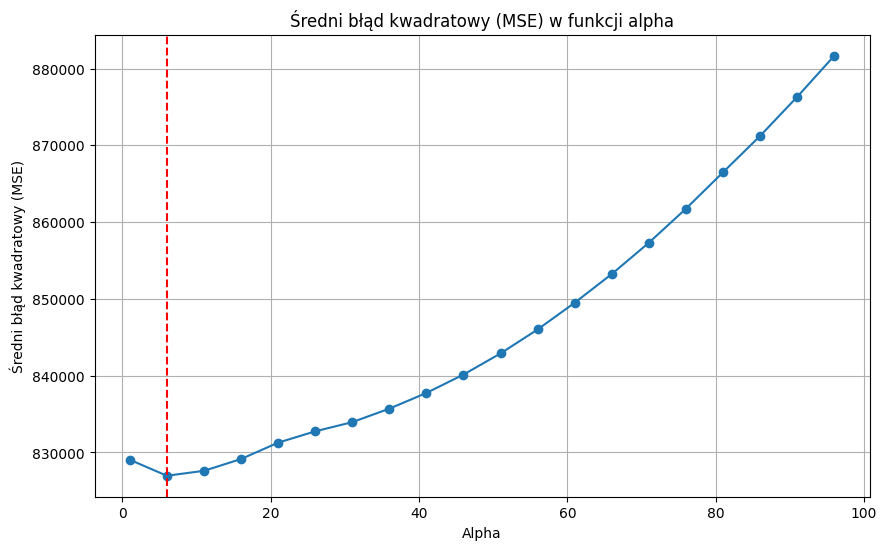

In [125]:
from sklearn.linear_model import LassoCV
from sklearn.model_selection import train_test_split

alphas = np.arange(1, 100, 5)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=92)
regressor = LassoCV(alphas=alphas, cv=3, random_state=92)
regressor.fit(X_train, y_train)
best_alpha = regressor.alpha_
print(f'Najlepsza wartość alpha to: {best_alpha}')
regressor_coef = list(zip(df.columns[:-1], regressor.coef_))
print(f"\nWspółczynniki Lasso z najlepszą alpha dla cech wynoszą odpowiednio:")
for i in regressor_coef:
    print(i)

mse_test = np.mean((regressor.predict(X_test) - y_test) ** 2)
print(f'\nMSE na zbiorze testowym: {mse_test}')

axis_X = regressor.alphas_
axis_Y = np.mean(regressor.mse_path_, axis=1)
data = np.array([axis_X, axis_Y])
figsize=(10, 6)

create_plot(data, "Średni błąd kwadratowy (MSE) w funkcji alpha", "Alpha", "Średni błąd kwadratowy (MSE)", figsize, best_alpha)

Wybraliśmy więc pewien parametr regularyzacji. Zobaczmy, jaki parametr alfa wybralibyśmy, gdybyśmy podzielili próbkę tylko raz na trening i test, tj. rozważyli trajektorie MSE odpowiadające oddzielnym blokom próbki.

### Zadanie 9

Wyprowadź wartości `alpha` odpowiadające minimom `MSE` na każdej partycji (tj. według kolumn).
Wizualizacja kolumn `mse_path_` na trzech oddzielnych wykresach.


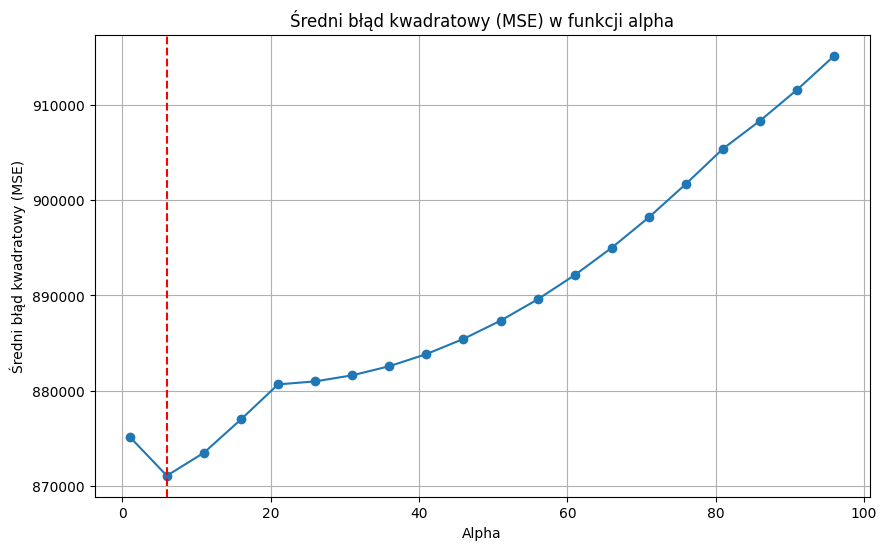

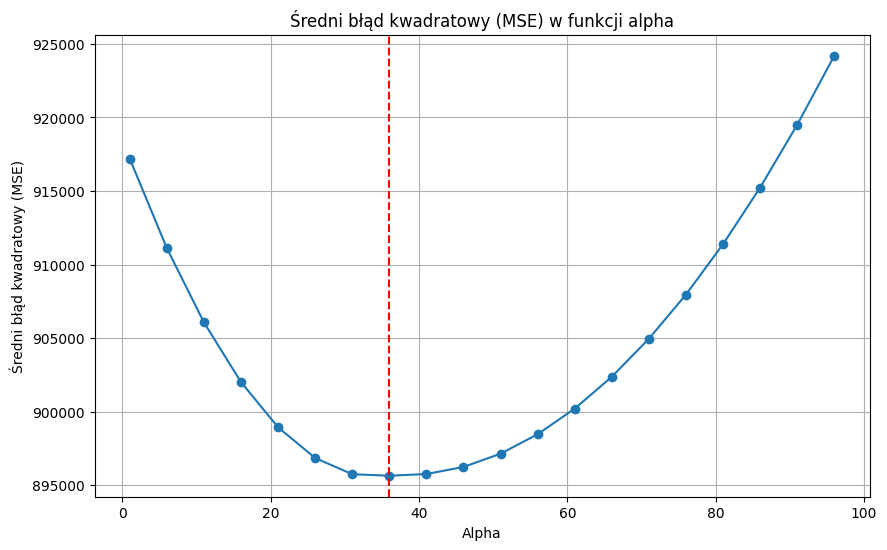

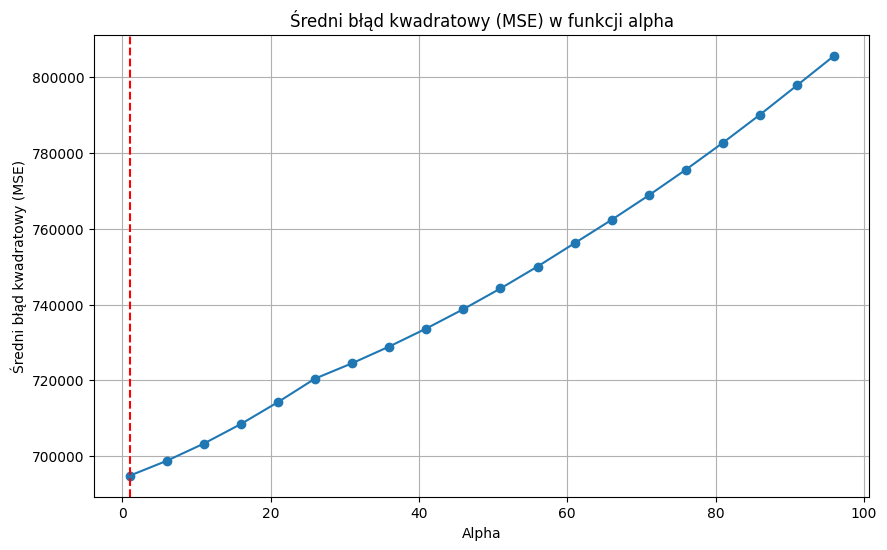

In [139]:
axis_X = regressor.alphas_

axis_Y_0 = regressor.mse_path_[:,0]
axis_Y_1 = regressor.mse_path_[:,1]
axis_Y_2 = regressor.mse_path_[:,2]

min_mse_alphas_0 = axis_X[np.argmin(axis_Y_0, axis=0)]
min_mse_alphas_1 = axis_X[np.argmin(axis_Y_1, axis=0)]
min_mse_alphas_2 = axis_X[np.argmin(axis_Y_2, axis=0)]

data_0 = np.array([axis_X, axis_Y_0])
data_1 = np.array([axis_X, axis_Y_1])
data_2 = np.array([axis_X, axis_Y_2])

figsize=(10, 6)

create_plot(data_0, "Średni błąd kwadratowy (MSE) w funkcji alpha", "Alpha", "Średni błąd kwadratowy (MSE)", figsize, min_mse_alphas_0)
create_plot(data_1, "Średni błąd kwadratowy (MSE) w funkcji alpha", "Alpha", "Średni błąd kwadratowy (MSE)", figsize, min_mse_alphas_1)
create_plot(data_2, "Średni błąd kwadratowy (MSE) w funkcji alpha", "Alpha", "Średni błąd kwadratowy (MSE)", figsize, min_mse_alphas_2)

W każdej partycji optymalna wartość "alfa" jest inna i odpowiada dużemu MSE w innych partycjach. Okazuje się, że dostosowujemy się do konkretnych próbek treningowych i kontrolnych. Kiedy wybieramy `alpha` w walidacji krzyżowej, wybieramy coś "średniego", co da akceptowalną wartość metryki na różnych partycjach próbki.

### Zadanie 10

Na koniec, jak to zwykle bywa w analizie danych, zinterpretujmy wynik. Odpowiedz na następujące pytania.

#### Pytanie 1

W ostatnim wytrenowanym modelu wybierz 4 cechy o najwyższych (dodatnich) współczynnikach (i wypisz je), spójrz na wizualizacje zależności `cnt` od tych cech, które narysowaliśmy w bloku "Poznawanie danych". Czy na wykresach widać rosnącą liniową zależność `cnt` od tych cech? Czy logiczne jest twierdzenie (wynikające ze zdrowego rozsądku), że im większa wartość tych atrybutów, tym więcej osób będzie chciało wypożyczyć rowery?

__Odpowiedź:__

In [153]:
sorted_coefficients = sorted(regressor_coef, key=lambda x: x[1], reverse=True)
print("Top 4 współczynników o najwyższych dodatnich wartościach:")
for i in sorted_coefficients[0:4]:
    print(i)

print("\nNa wykresach widać rosnącą liniową zależność cnt.")
print("\nNielogiczne jest stwierdzenie, że im większa wartość tych atrybutów, \ntym więcej osób będzie chciało wypożyczyć rowery.")


Top 4 współczynników o najwyższych dodatnich wartościach:
('yr', 1022.718143621444)
('atemp', 977.4380780885872)
('season', 532.1403272580343)
('weekday', 117.47635488489782)

Na wykresach widać rosnącą liniową zależność cnt.

Nielogiczne jest stwierdzenie, że im większa wartość tych atrybutów, 
tym więcej osób będzie chciało wypożyczyć rowery.


#### Pytanie 2

Wybierz 3 cechy o największych współczynnikach modulo ujemnych (i wypisz je), spójrz na odpowiednie wizualizacje. Czy widoczna jest malejąca zależność liniowa? Czy logiczne jest stwierdzenie, że im większa wielkość tych cech, tym mniej osób będzie chciało wsiąść na rower?

__Odpowiedź:__

In [152]:
sorted_coefficients = sorted(regressor_coef, key=lambda x: x[1], reverse=False)
print("Top 3 współczynników modulo ujemnych:")
for i in sorted_coefficients[0:3]:
    print(i)

print("\nNa wykresach nie widać malejącej zależności liniowej od cnt.")
print("\nLogiczne jest stwierdzenie, że im większa wartość tych atrybutów,\ntym mniej osób będzie chciało wypożyczyć rowery.")

Top 3 współczynników modulo ujemnych:
('weathersit', -287.8960074808995)
('windspeed(mph)', -235.69359717654888)
('hum', -203.80814290778775)

Na wykresach nie widać malejącej zależności liniowej od cnt.

Logiczne jest stwierdzenie, że im większa wartość tych atrybutów,
tym mniej osób będzie chciało wypożyczyć rowery.


#### Pytanie 3

Wypisz znaki ze współczynnikami bliskimi zeru (< 1e-3). Jak myślisz, dlaczego model wykluczył je z modelu (spójrz ponownie na wykresy)? Czy to prawda, że nie mają one wpływu na popyt na rowery?

__Odpowiedź:__

In [161]:
sorted_coefficients = sorted(regressor_coef, key=lambda x: x[1], reverse=True)
for i in sorted_coefficients:
    if -1e-3 < i[1] < 1e-3:
        print(i)
    
print("\nWskaźnik temp ma wpływ na popyt na rowery, jednak jest współliniowy z temp,\ndlatego też nie jest brany pod uwagę.")
print("\nWskaźnik windspeed(ms) nie wpływa na popyt na rowey.")

('temp', 0.0)
('windspeed(ms)', -2.29322090257563e-08)

Wskaźnik temp ma wpływ na popyt na rowery, jednak jest współliniowy z temp,
dlatego też nie jest brany pod uwagę.

Wskaźnik windspeed(ms) nie wpływa na popyt na rowey.


### Wnioski
Widzieliśmy więc, jak monitorować adekwatność modelu liniowego, jak wybierać cechy i jak prawidłowo wybrać współczynnik regularyzacji, jeśli to możliwe bez dostosowywania się do określonej części danych.

Warto zauważyć, że wygodnie jest wybrać tylko niewielką liczbę parametrów (1, 2, maksymalnie 3) za pomocą walidacji krzyżowej, ponieważ dla każdej dopuszczalnej kombinacji parametrów musimy trenować model kilka razy. Proces ten zajmuje dużo czasu, zwłaszcza jeśli musimy trenować na dużych ilościach danych.